# Table of Content

1. [Get Data](#data)
2. [Clean Data](#clean_data)
3. [Analysis and Visualizations](#analysis)
4. [Map Plot of Popular Stations](#map)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data  <a name="data"></a>

In [2]:
## Read in the 12 previous months of trip information

df1 = pd.read_csv('202004-divvy-tripdata.csv')
df2 = pd.read_csv('202005-divvy-tripdata.csv')
df3 = pd.read_csv('202006-divvy-tripdata.csv')
df4 = pd.read_csv('202007-divvy-tripdata.csv')
df5 = pd.read_csv('202008-divvy-tripdata.csv')
df6 = pd.read_csv('202009-divvy-tripdata.csv')
df7 = pd.read_csv('202010-divvy-tripdata.csv')
df8 = pd.read_csv('202011-divvy-tripdata.csv')
df9 = pd.read_csv('202012-divvy-tripdata.csv')
df10 = pd.read_csv('202101-divvy-tripdata.csv')
df11 = pd.read_csv('202102-divvy-tripdata.csv')
df12 = pd.read_csv('202103-divvy-tripdata.csv')

In [3]:
frames = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12]

In [4]:
df = pd.concat(frames)  ## Join all the dataframes into a single dataframe

In [5]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual


In [6]:
df1.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
84771,200E9CDFC5685AA0,docked_bike,2020-04-16 16:10:16,2020-04-16 16:23:11,Dearborn Pkwy & Delaware Pl,140,Dearborn Pkwy & Delaware Pl,140.0,41.8990,-87.6299,41.8990,-87.6299,member
84772,F58A8F2ABCB5D95B,docked_bike,2020-04-30 17:56:12,2020-04-30 18:15:21,Kimbark Ave & 53rd St,322,Cottage Grove Ave & 51st St,351.0,41.7996,-87.5947,41.8030,-87.6066,casual
84773,A3754693A80E4913,docked_bike,2020-04-24 19:57:33,2020-04-24 21:50:43,Sedgwick St & Schiller St,236,Wells St & Elm St,182.0,41.9076,-87.6386,41.9032,-87.6343,casual
84774,D610CABB67F7B744,docked_bike,2020-04-02 17:59:55,2020-04-02 18:42:26,Damen Ave & Charleston St,310,Damen Ave & Charleston St,310.0,41.9201,-87.6779,41.9201,-87.6779,casual
84775,79634521ABE4CF69,docked_bike,2020-04-04 01:31:27,2020-04-04 01:37:27,Clybourn Ave & Division St,138,Clybourn Ave & Division St,138.0,41.9046,-87.6406,41.9046,-87.6406,casual


In [7]:
import gc

In [8]:
# Clean up the individual dataframes to free up memory

del frames
gc.collect()
frames = pd.DataFrame()

In [9]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3489748 entries, 0 to 228495
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             3489748 non-null  object 
 1   rideable_type       3489748 non-null  object 
 2   started_at          3489748 non-null  object 
 3   ended_at            3489748 non-null  object 
 4   start_station_name  3367573 non-null  object 
 5   start_station_id    3366947 non-null  object 
 6   end_station_name    3346506 non-null  object 
 7   end_station_id      3346045 non-null  object 
 8   start_lat           3489748 non-null  float64
 9   start_lng           3489748 non-null  float64
 10  end_lat             3485010 non-null  float64
 11  end_lng             3485010 non-null  float64
 12  member_casual       3489748 non-null  object 
dtypes: float64(4), object(9)
memory usage: 372.7+ MB


## Clean Data  <a name="clean_data"></a>

In [10]:
df.reset_index(inplace=True)

In [11]:
# Convert the 'started_at' and 'ended_at' fields to datetime for efficency and so 
# that more data engineering can occur as needed.

df[['started_at', 'ended_at']] = df[['started_at', 'ended_at']].apply(pd.to_datetime)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489748 entries, 0 to 3489747
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   index               int64         
 1   ride_id             object        
 2   rideable_type       object        
 3   started_at          datetime64[ns]
 4   ended_at            datetime64[ns]
 5   start_station_name  object        
 6   start_station_id    object        
 7   end_station_name    object        
 8   end_station_id      object        
 9   start_lat           float64       
 10  start_lng           float64       
 11  end_lat             float64       
 12  end_lng             float64       
 13  member_casual       object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(7)
memory usage: 372.7+ MB


In [13]:
import datetime

In [14]:
# Create a new field, 'duration', for the dataframe for use later. The field is set in hours.

df['duration'] = df.ended_at - df.started_at
df['duration'] = df['duration']/np.timedelta64(1, 'h')

In [15]:
df.head()

,index,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,0.446944
1,1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,0.135833
2,2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,0.239722
3,3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,0.203333
4,4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,0.881944


In [16]:
# Check for bad data in stared_at and ended_at by looking at duration that is negative
# 

x=df[(df.duration < 0)].index
df.loc[x, ['started_at', 'ended_at','duration']]

,started_at,ended_at,duration
2422,2020-04-27 17:20:30,2020-04-27 17:20:18,-0.003333
2504,2020-04-20 16:51:18,2020-04-20 16:51:05,-0.003611
3136,2020-04-12 19:09:54,2020-04-12 19:09:40,-0.003889
3542,2020-04-29 17:37:11,2020-04-29 17:37:07,-0.001111
8212,2020-04-05 15:46:12,2020-04-05 15:46:11,-0.000278
...,...,...,...
3114590,2020-12-15 12:02:17,2020-11-25 18:03:18,-473.983056
3121388,2021-01-09 15:42:45,2021-01-09 15:41:02,-0.028611
3150548,2021-01-06 18:33:12,2021-01-06 18:31:07,-0.034722
3300569,2021-03-29 15:41:21,2021-03-29 15:41:20,-0.000278


In [17]:
# Delete the 10552 rows that have significant start - end discrepancies

df.drop(labels = x, inplace=True)
df.reset_index(drop=True, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479196 entries, 0 to 3479195
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   index               int64         
 1   ride_id             object        
 2   rideable_type       object        
 3   started_at          datetime64[ns]
 4   ended_at            datetime64[ns]
 5   start_station_name  object        
 6   start_station_id    object        
 7   end_station_name    object        
 8   end_station_id      object        
 9   start_lat           float64       
 10  start_lng           float64       
 11  end_lat             float64       
 12  end_lng             float64       
 13  member_casual       object        
 14  duration            float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(7)
memory usage: 398.2+ MB


In [19]:
## Are there any missing values and what columns are they in
# The missing data is in the start and end station information and in the latitude and longitude data.

df.isnull().sum()

index                      0
ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    122128
start_station_id      122754
end_station_name      143158
end_station_id        143619
start_lat                  0
start_lng                  0
end_lat                 4712
end_lng                 4712
member_casual              0
duration                   0
dtype: int64

In [20]:
df.isnull().sum().sum()

541083

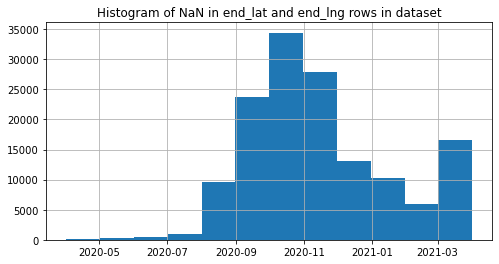

In [21]:
df[df.end_station_name.isnull()].started_at.hist(figsize=(8,4),bins=12)
plt.title('Histogram of NaN in end_lat and end_lng rows in dataset');


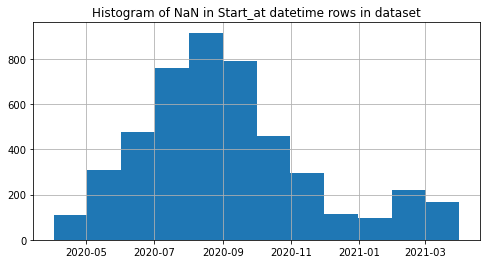

In [22]:
## What is the distribution of the missing end locations based on the start datetime of trip
df[df.end_lat.isnull()].started_at.hist(figsize=(8,4),bins=12)
plt.title('Histogram of NaN in Start_at datetime rows in dataset');


##### The histograms show us that the missing data is scattered throughout the dataset. The missing data represents less than 6% of the total data available and will be dropped.

In [23]:
df.dropna(inplace=True)

In [24]:
df.reset_index(drop= True, inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3284237 entries, 0 to 3284236
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   index               int64         
 1   ride_id             object        
 2   rideable_type       object        
 3   started_at          datetime64[ns]
 4   ended_at            datetime64[ns]
 5   start_station_name  object        
 6   start_station_id    object        
 7   end_station_name    object        
 8   end_station_id      object        
 9   start_lat           float64       
 10  start_lng           float64       
 11  end_lat             float64       
 12  end_lng             float64       
 13  member_casual       object        
 14  duration            float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(7)
memory usage: 375.9+ MB


In [26]:
from geopy.distance import geodesic

In [27]:
# Create a new field that shows distance (in a straight line) between the 
# start station and the end station. This will serve as an estimate of the distance the user rode.

df['distance'] = np.zeros((len(df),1))

In [28]:
def distance_calc(dataframe):
    distance_list = []
    for row in df.itertuples():
        
        distance_list.append(round(geodesic((row.start_lat, row.start_lng), (row.end_lat, row.end_lng)).miles, 5))
        
    df['distance'] = distance_list  
       

In [29]:
distance_calc(df)

In [30]:
df.isna().sum()

index                 0
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
duration              0
distance              0
dtype: int64

In [31]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3284237 entries, 0 to 3284236
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   index               3284237 non-null  int64         
 1   ride_id             3284237 non-null  object        
 2   rideable_type       3284237 non-null  object        
 3   started_at          3284237 non-null  datetime64[ns]
 4   ended_at            3284237 non-null  datetime64[ns]
 5   start_station_name  3284237 non-null  object        
 6   start_station_id    3284237 non-null  object        
 7   end_station_name    3284237 non-null  object        
 8   end_station_id      3284237 non-null  object        
 9   start_lat           3284237 non-null  float64       
 10  start_lng           3284237 non-null  float64       
 11  end_lat             3284237 non-null  float64       
 12  end_lng             3284237 non-null  float64       
 13  member_casua

In [32]:
## Create more data fields to compare usage and patterns between members and casual users

df['start_day_of_week'] = df.started_at.dt.weekday
df['start_month'] = df.started_at.dt.month
df['hour'] = df.started_at.dt.hour

In [33]:
day_of_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

df_group = df.groupby('member_casual')

In [34]:
df_group.ride_id.count()

member_casual
casual    1348018
member    1936219
Name: ride_id, dtype: int64

## Analysis and Visualizations  <a name="analysis"></a>

In [35]:
# Calculate the percent each type of rider makes of total

print('Casual riders make up','{:.2%}'.format(df[df.member_casual=='casual'].ride_id.count() / df.ride_id.count()),'of total rides')
print('Member riders make up','{:.2%}'.format(df[df.member_casual=='member'].ride_id.count() / df.ride_id.count()),'of total rides')

Casual riders make up 41.05% of total rides
Member riders make up 58.95% of total rides


The members made up almost 59% of the total rides taken over the last 12 months

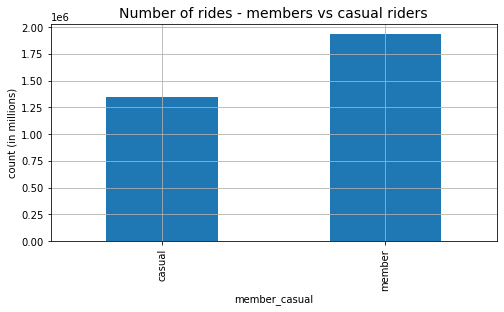

In [36]:
df_group.start_station_name.count().plot.bar(figsize=(8,4))
plt.title('Number of rides - members vs casual riders', size=14)
plt.ylabel('count (in millions)')
plt.grid(True)

In [37]:
## Compare the day of week rides start between members and casual riders
print(df[df.member_casual == 'casual'].start_day_of_week.value_counts(sort=False))
print(df[df.member_casual == 'member'].start_day_of_week.value_counts(sort=False))

0    142042
1    136218
2    148352
3    156177
4    196451
5    319017
6    249761
Name: start_day_of_week, dtype: int64
0    251905
1    268223
2    288390
3    283731
4    288897
5    304608
6    250465
Name: start_day_of_week, dtype: int64


I want to understand if members made more rider on every day of the week.


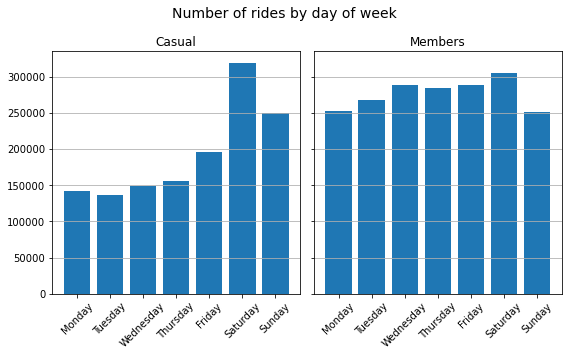

In [80]:
day_of_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(8,5))

ax1.bar(day_of_week, df[df.member_casual == 'casual']['start_day_of_week'].value_counts(sort=False))
ax1.tick_params(axis='x', rotation=45)
ax1.grid(b=True, axis='y')
ax1.set_title('Casual')

ax2.bar(day_of_week, df[df.member_casual == 'member']['start_day_of_week'].value_counts(sort=False))
ax2.tick_params(axis='x', rotation=45)
ax2.set_title('Members')
ax2.grid(b=True, axis='y')


plt.suptitle('Number of rides by day of week', size=14)
plt.tight_layout()

We see that the members were much more consistent during the work week and weekend while casual riders used the service much more frequently on the weekends.

In [39]:
df.groupby(['member_casual','hour']).start_station_name.count()

member_casual  hour
casual         0        20955
               1        13029
               2         7155
               3         3762
               4         3064
               5         4923
               6        12110
               7        21755
               8        29789
               9        38325
               10       55096
               11       76235
               12       92724
               13      100794
               14      106951
               15      112562
               16      119366
               17      132735
               18      120115
               19       91953
               20       64384
               21       46252
               22       41018
               23       32966
member         0        10818
               1         6043
               2         3198
               3         2016
               4         3278
               5        16446
               6        54162
               7        90599
               8    

Now I want to see the usage by time of day (on an hourly baisis)

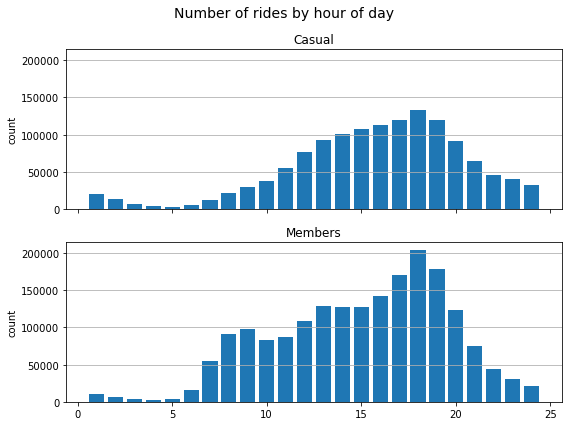

In [40]:
# Chart of usage by hour of day

fig, (ax1, ax2) = plt.subplots(2,1, sharey=True, sharex=True, figsize=(8,6))

ax1.bar(range(1,25), df[df.member_casual == 'casual']['hour'].value_counts(sort=False))
ax1.tick_params(axis='x', rotation=45)
ax1.grid(b=True, axis='y')
ax1.set(ylabel='count')
ax1.set_title('Casual')

ax2.bar(range(1,25), df[df.member_casual == 'member']['hour'].value_counts(sort=False))
ax2.tick_params(axis='x', rotation=0)
ax2.set_title('Members')
ax2.grid(b=True, axis='y')
ax2.set(ylabel='count')


plt.suptitle('Number of rides by hour of day', size=14)
plt.tight_layout()

There is a difference in when members and casual riders use the service. We see members showing two spikes in usage, morning and evening. Casual riders show on one peak in the evening.

Next I wanted to look at this hourly pattern by day.

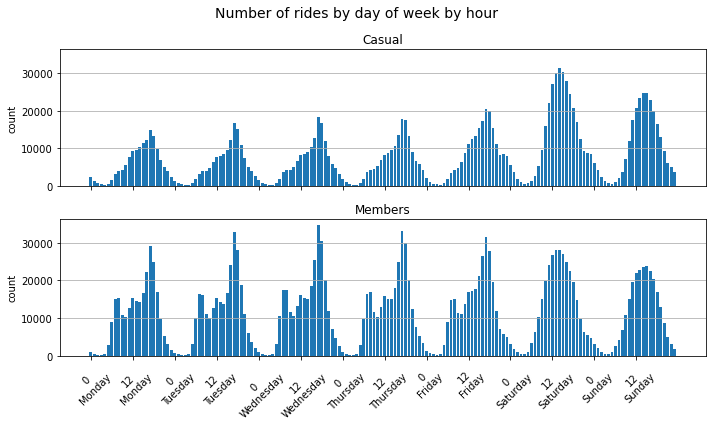

In [41]:
fig, (ax1, ax2) = plt.subplots(2,1, sharey=True, sharex=True, figsize=(10,6))

ax1.bar(range(1,169),df[df.member_casual == 'casual'].groupby(['start_day_of_week','hour']).hour.count())
ax1.tick_params(axis='x', rotation=45)
ax1.grid(b=True, axis='y')
ax1.set(ylabel='count')
ax1.set_title('Casual')

ax2.bar(range(1,169),df[df.member_casual == 'member'].groupby(['start_day_of_week','hour']).hour.count())
ax2.tick_params(axis='x', rotation=45)
ax2.set_xticks(range(1,169,12))
ax2.set_xticklabels(['0\nMonday', '12\nMonday','0\nTuesday','12\nTuesday','0\nWednesday','12\nWednesday','0\nThursday','12\nThursday','0\nFriday','12\nFriday','0\nSaturday','12\nSaturday','0\nSunday','12\nSunday'])
ax2.set_title('Members')
ax2.grid(b=True, axis='y')
ax2.set(ylabel='count')


plt.suptitle('Number of rides by day of week by hour', size=14)
plt.tight_layout()

We see that during the work week, the two peak pattern is present for member users. However, on the weekends, the usage pattern more resembles the pattern of casual riders. 

In [42]:
df_group.start_month.value_counts(sort=False)

member_casual  start_month
casual         1               14690
               2                8613
               3               75641
               4               23570
               5               86699
               6              154342
               7              268125
               8              281987
               9              214681
               10             122328
               11              72850
               12              24492
member         1               68819
               2               34383
               3              130048
               4               61056
               5              113083
               6              187727
               7              280556
               8              323759
               9              283582
               10             215072
               11             149085
               12              89049
Name: start_month, dtype: int64

In [82]:
I wanted to check seasonality in ridership.

SyntaxError: invalid syntax (<ipython-input-82-e701351a3bc0>, line 1)

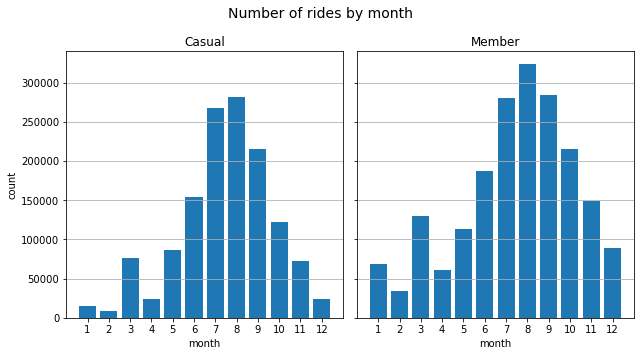

In [43]:
month = ['1','2','3','4','5','6','7','8','9','10','11','12']

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(9,5))

ax1.bar(month, df[df.member_casual=='casual']['start_month'].value_counts(sort=False))
ax1.tick_params(axis='x')
ax1.set_title('Casual')
ax1.grid(b=True, axis='y')
ax1.set(ylabel='count', xlabel='month')

ax2.bar(month, df[df.member_casual=='member']['start_month'].value_counts(sort=False))
ax2.tick_params(axis='x')
ax2.set_title('Member')
ax2.grid(b=True, axis='y')
ax2.set(xlabel='month')

plt.suptitle('Number of rides by month', size=14)
plt.tight_layout();

As expected, there are more rides during the warmer months. Both casual riders and members show a very similar seasonality patter.

In [44]:
df_group.duration.mean()

member_casual
casual    0.757541
member    0.265553
Name: duration, dtype: float64

How long do the different riders' trips last?

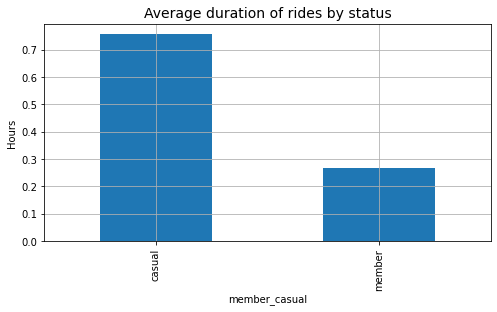

In [45]:
## Compare duration of rides between members and casual riders
df_group.duration.mean().plot.bar(figsize=(8,4))
#plt.ylabel('hours')
plt.title('Average duration of rides by status', size=14)
plt.ylabel('Hours')
plt.grid(True);

We see that on average, casual riders' trips last about 3/4 of an hour while members average less than 20 minutes.

In [46]:
df_group.distance.mean()

member_casual
casual    1.341786
member    1.404484
Name: distance, dtype: float64

Next, I compared how far the average ride was for casual riders and memeber.

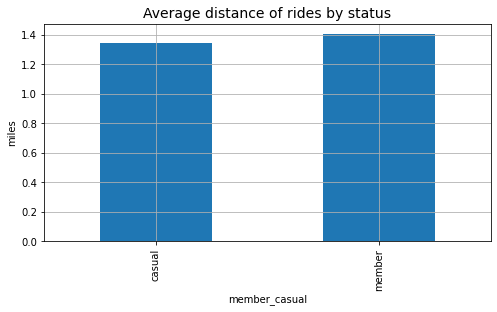

In [47]:
## Compare distance of rides between members and casual riders
df_group.distance.mean().plot.bar(figsize=(8,4))
#plt.ylabel('hours')
plt.title('Average distance of rides by status', size=14)
plt.ylabel('miles')
plt.grid(True);

Interestlingly, the average distance riden is about the same for each group. 

Since time was very different but distance was not, I wanted to see how this looked by day.

In [48]:
df.groupby(['member_casual', 'start_day_of_week']).duration.mean()

member_casual  start_day_of_week
casual         0                    0.758119
               1                    0.682119
               2                    0.681386
               3                    0.726584
               4                    0.720921
               5                    0.788460
               6                    0.852251
member         0                    0.251565
               1                    0.249519
               2                    0.250792
               3                    0.250501
               4                    0.259446
               5                    0.294726
               6                    0.302399
Name: duration, dtype: float64

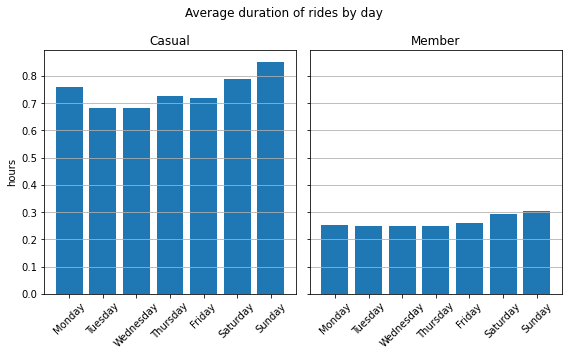

In [49]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(8,5))

ax1.bar(day_of_week, df[df.member_casual=='casual'].groupby('start_day_of_week')['duration'].mean())
ax1.set_title('Casual')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(b=True, axis='y')
ax1.set(ylabel='hours')

ax2.bar(day_of_week, df[df.member_casual=='member'].groupby('start_day_of_week')['duration'].mean())
ax2.set_title('Member')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(b=True, axis='y')

plt.suptitle('Average duration of rides by day')
plt.tight_layout()

We see that casual riders consistently averaged longer ride times than members, regardless of the day of the week.


In [50]:
df.groupby(['member_casual', 'start_day_of_week'])['distance'].mean()

member_casual  start_day_of_week
casual         0                    1.260903
               1                    1.293199
               2                    1.317831
               3                    1.319489
               4                    1.350301
               5                    1.425331
               6                    1.329050
member         0                    1.369796
               1                    1.373450
               2                    1.381660
               3                    1.381141
               4                    1.390533
               5                    1.471882
               6                    1.459450
Name: distance, dtype: float64

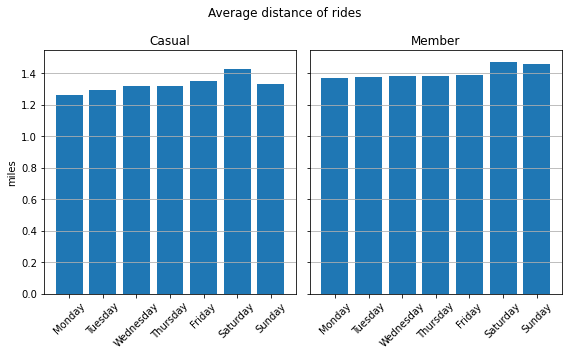

In [51]:
fig, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(8,5))

ax1.bar(day_of_week, df[df.member_casual=='casual'].groupby('start_day_of_week').distance.mean())
ax1.set_title('Casual')
ax1.grid(b=True,axis='y')
ax1.tick_params(axis='x', rotation=45)
ax1.set(ylabel='miles')

ax2.bar(day_of_week, df[df.member_casual=='member'].groupby('start_day_of_week').distance.mean())
ax2.set_title('Member')
ax2.grid(b=True,axis='y')
ax2.tick_params(axis='x', rotation=45)

plt.suptitle('Average distance of rides')
plt.tight_layout();

Ane we see that the distance of rides was consistent by days of the week for both casual and member riders.

This means that the average speed of member riders was faster than the average speed of casual riders.

Next, I wanted to check the numbers on roundtrip rides. As seen below, only about 8.7% of the total rides started and ended at the same station. Of these trips, about 70% were made by casual riders.

In [52]:
roundtrip = df[df.distance==0].ride_id.count()
tot =len(df)
print('Total # of roundtrip rides','{:,}'.format(roundtrip))
print('Percent of total rides','{:.2%}'.format(roundtrip/tot))

Total # of roundtrip rides 286,475
Percent of total rides 8.72%


In [53]:
df[df.distance == 0].groupby('member_casual')['member_casual'].value_counts(sort=False)


member_casual  member_casual
casual         casual           200817
member         member            85658
Name: member_casual, dtype: int64

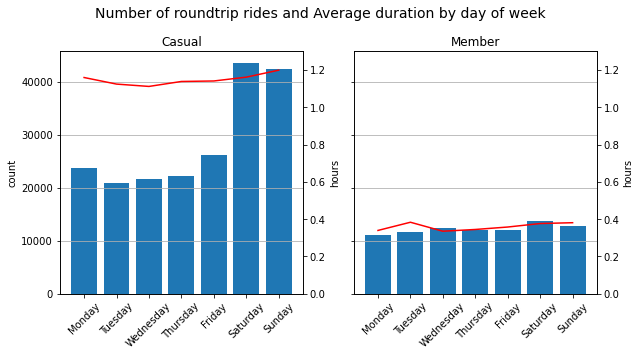

In [54]:
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, sharey=True, figsize=(9,5))

ax1.bar(day_of_week, df[(df.distance == 0) & (df.member_casual == 'casual')].groupby('start_day_of_week')['start_day_of_week'].value_counts())
ax1.set_title('Casual')
ax1.grid(b=True, axis='y')
ax1.tick_params(axis='x', rotation=45)
ax1.set(ylabel='count')
ax01 = ax1.twinx()
ax01.plot(df[(df.distance == 0) & (df.member_casual == 'casual')].groupby('start_day_of_week')['duration'].mean(), c='r')
ax01.set(ylabel='hours')
ax01.set_ylim(0,1.3)

ax2.bar(day_of_week, df[(df.distance == 0) & (df.member_casual == 'member')].groupby('start_day_of_week')['start_day_of_week'].value_counts())
ax2.set_title('Member')
ax2.grid(b=True, axis='y')
ax2.tick_params(axis='x', rotation=45)
ax02 = ax2.twinx()
ax02.plot(df[(df.distance == 0) & (df.member_casual == 'member')].groupby('start_day_of_week')['duration'].mean(), c='r')
ax02.set(ylabel='hours')
ax02.set_ylim(0,1.3)

plt.suptitle('Number of roundtrip rides and Average duration by day of week', size=14)
plt.tight_layout();

The company offers three types of bikes to use. I wanted to see how these broke out by rider type.

In [55]:
df_group.rideable_type.value_counts()

member_casual  rideable_type
casual         docked_bike      1111448
               electric_bike     166138
               classic_bike       70432
member         docked_bike      1432527
               electric_bike     255511
               classic_bike      248181
Name: rideable_type, dtype: int64

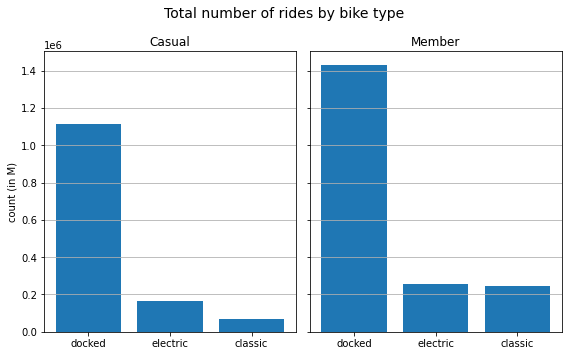

In [56]:
ride_type = ['docked', 'electric', 'classic']
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(8,5))

ax1.bar(ride_type ,df[df.member_casual == 'casual'].rideable_type.value_counts())
ax1.set_title('Casual')
ax1.grid(axis='y', b=True)
ax1.set(ylabel='count (in M)')

ax2.bar(ride_type ,df[df.member_casual == 'member'].rideable_type.value_counts())
ax2.set_title('Member')
ax2.grid(axis='y', b=True)

plt.suptitle('Total number of rides by bike type', size=14)
plt.tight_layout()

For both casual riders and members, the predominant bike used was the docked.

In [57]:
df_rideable = df.groupby(['member_casual', 'start_day_of_week', 'rideable_type']).ride_id.count()
df_rideable.head()

member_casual  start_day_of_week  rideable_type
casual         0                  classic_bike       8952
                                  docked_bike      114447
                                  electric_bike     18643
               1                  classic_bike       8334
                                  docked_bike      109036
Name: ride_id, dtype: int64

Next, I wanted to see how day of week impacted bike type useage.

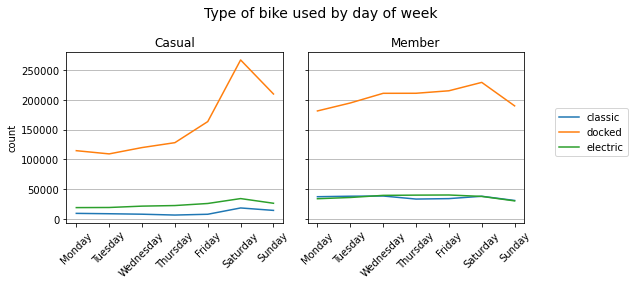

In [58]:
df_casual = df_rideable.xs('casual').unstack()
df_casual.index = day_of_week
df_member = df_rideable.xs('member').unstack()
df_member.index = day_of_week

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(9,4))

ax1.plot(df_casual)
ax1.set_title('Casual')
ax1.grid(b=True, axis='y')
ax1.tick_params(axis='x', rotation=45)
ax1.set(ylabel='count')

ax2.plot(df_member)
ax2.set_title('Member')
ax2.grid(b=True, axis='y')
ax2.tick_params(axis='x', rotation=45)

plt.legend(['classic', 'docked', 'electric'], bbox_to_anchor=(1,0.7,.5,0))
plt.suptitle('Type of bike used by day of week', size=14)
plt.tight_layout()

We see that there is very little change based on the day of the week for electric and classic bike types. This consistency was true for both casual riders and members. The largest amount of variation day to day was shown in the docked bike type.

## Map Plot of Popular Stations <a name="map"></a>

In [59]:
top_25_cas = df[df.member_casual=='casual'].start_station_name.value_counts().head(25)

In [60]:
top_25_mem = df[df.member_casual=='member'].start_station_name.value_counts().head(25)

In [61]:
top_25_cas

Streeter Dr & Grand Ave           25975
Lake Shore Dr & Monroe St         20469
Millennium Park                   19236
Theater on the Lake               14837
Indiana Ave & Roosevelt Rd        13488
Michigan Ave & Oak St             13482
Lake Shore Dr & North Blvd        13197
Clark St & Elm St                 11819
Michigan Ave & Lake St            11589
Michigan Ave & Washington St      10566
Clark St & Lincoln Ave            10042
Buckingham Fountain                9965
Wells St & Concord Ln              9878
Clark St & Armitage Ave            9733
Shedd Aquarium                     9721
Michigan Ave & 8th St              9634
Wabash Ave & Grand Ave             9632
Columbus Dr & Randolph St          9332
Wells St & Elm St                  9083
Fairbanks Ct & Grand Ave           8928
Lake Shore Dr & Wellington Ave     8695
Wabash Ave & Roosevelt Rd          8685
Wells St & Evergreen Ave           8681
Lake Shore Dr & Belmont Ave        8666
Lakeview Ave & Fullerton Pkwy      8481


In [62]:
df_c=pd.DataFrame(top_25_cas)

In [63]:
df_c.columns=['count']

In [64]:
df_c = df_c.reset_index()

In [65]:
df_c

,index,count
0,Streeter Dr & Grand Ave,25975
1,Lake Shore Dr & Monroe St,20469
2,Millennium Park,19236
3,Theater on the Lake,14837
4,Indiana Ave & Roosevelt Rd,13488
5,Michigan Ave & Oak St,13482
6,Lake Shore Dr & North Blvd,13197
7,Clark St & Elm St,11819
8,Michigan Ave & Lake St,11589
9,Michigan Ave & Washington St,10566


In [66]:
top_25_mem

Clark St & Elm St                 20005
Broadway & Barry Ave              15541
St. Clair St & Erie St            15174
Dearborn St & Erie St             15069
Wells St & Concord Ln             14836
Theater on the Lake               14516
Kingsbury St & Kinzie St          14049
Wells St & Huron St               13864
Wells St & Elm St                 13815
Clark St & Armitage Ave           13717
Lake Shore Dr & North Blvd        13530
Desplaines St & Kinzie St         13454
Lake Shore Dr & Wellington Ave    12537
Columbus Dr & Randolph St         12270
Larrabee St & Webster Ave         12215
Clark St & Schiller St            12076
Clark St & Lincoln Ave            12046
Broadway & Cornelia Ave           11908
Dearborn Pkwy & Delaware Pl       11738
Wabash Ave & Grand Ave            11547
Wabash Ave & Roosevelt Rd         11485
Kingsbury St & Erie St            11156
Clark St & Drummond Pl            10986
Broadway & Waveland Ave           10959
Clark St & Wrightwood Ave         10818


In [67]:
df_m=pd.DataFrame(top_25_mem)

In [68]:
df_m.columns=['count']

In [69]:
df_m = df_m.reset_index()

In [70]:
df_m

,index,count
0,Clark St & Elm St,20005
1,Broadway & Barry Ave,15541
2,St. Clair St & Erie St,15174
3,Dearborn St & Erie St,15069
4,Wells St & Concord Ln,14836
5,Theater on the Lake,14516
6,Kingsbury St & Kinzie St,14049
7,Wells St & Huron St,13864
8,Wells St & Elm St,13815
9,Clark St & Armitage Ave,13717


In [71]:
stations = df.groupby('start_station_name')[['start_lat','start_lng']].last().reset_index()
stations

,start_station_name,start_lat,start_lng
0,2112 W Peterson Ave,41.991178,-87.683593
1,63rd St Beach,41.781016,-87.576120
2,900 W Harrison St,41.874754,-87.649807
3,Aberdeen St & Jackson Blvd,41.877726,-87.654787
4,Aberdeen St & Monroe St,41.880419,-87.655519
...,...,...,...
697,Wood St & Taylor St (Temp),41.869265,-87.673731
698,Woodlawn Ave & 55th St,41.795264,-87.596471
699,Woodlawn Ave & 75th St,41.759160,-87.595751
700,Woodlawn Ave & Lake Park Ave,41.814093,-87.597005


In [72]:
df_1c = pd.merge(df_c, stations, how='left', left_on='index', right_on='start_station_name').drop(columns='index')

In [73]:
df_1c

,count,start_station_name,start_lat,start_lng
0,25975,Streeter Dr & Grand Ave,41.892278,-87.612043
1,20469,Lake Shore Dr & Monroe St,41.880958,-87.616743
2,19236,Millennium Park,41.881032,-87.624084
3,14837,Theater on the Lake,41.926277,-87.630834
4,13488,Indiana Ave & Roosevelt Rd,41.867888,-87.623041
5,13482,Michigan Ave & Oak St,41.900960,-87.623777
6,13197,Lake Shore Dr & North Blvd,41.911722,-87.626804
7,11819,Clark St & Elm St,41.902678,-87.631677
8,11589,Michigan Ave & Lake St,41.886024,-87.624117
9,10566,Michigan Ave & Washington St,41.883984,-87.624684


In [74]:
df_1m = pd.merge(df_m, stations, how='left', left_on='index', right_on='start_station_name').drop(columns='index')

In [75]:
df_1m['member_casual']='member'
df_1c['member_casual']='casual'

In [76]:
df_geomap = pd.concat([df_1c, df_1m])
df_geomap

,count,start_station_name,start_lat,start_lng,member_casual
0,25975,Streeter Dr & Grand Ave,41.892278,-87.612043,casual
1,20469,Lake Shore Dr & Monroe St,41.880958,-87.616743,casual
2,19236,Millennium Park,41.881032,-87.624084,casual
3,14837,Theater on the Lake,41.926277,-87.630834,casual
4,13488,Indiana Ave & Roosevelt Rd,41.867888,-87.623041,casual
5,13482,Michigan Ave & Oak St,41.900960,-87.623777,casual
6,13197,Lake Shore Dr & North Blvd,41.911722,-87.626804,casual
7,11819,Clark St & Elm St,41.902678,-87.631677,casual
8,11589,Michigan Ave & Lake St,41.886024,-87.624117,casual
9,10566,Michigan Ave & Washington St,41.883984,-87.624684,casual


In [77]:
import plotly.express as px

Next, I wanted to see where the top 25 stations casual riders and top 25 stations for members were located.

In [83]:
# Create a map with locations of top 25 stations by group

fig = px.scatter_mapbox(df_geomap, hover_name='start_station_name', lat=df_geomap.start_lat, lon="start_lng", opacity=0.7, color="member_casual", size='count')
fig.update_layout(mapbox_style="open-street-map")
fig.show()

It is interesting to note that the vast majority of popular member stations are North of the city. The popular casual rider stations are spread more evenly North to South but not West.

This could indicate patterns in the commuters versus riders that are starting at desination spots. It would be interesting to understand why more members are in the North and West Chicago. 

In [79]:
df.to_csv('bikeshare.csv')
